# Importing Particulate Matter jupyter notebook

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
# Replace 'your_file.csv' with your actual file path
df10 = pd.read_csv('PM10-sensors_legit.csv')


df10.head
# Display initial info about NaN values
print("Initial NaN count per column:")

print(df10.isnull().sum())

# Option 1: Remove rows with any NaN values
df10_clean = df10.dropna()

# Option 2: Fill NaN values with mean of the column
#df10_clean = df10.fillna(df10_clean.mean())

# Option 3: Fill NaN values with median of the column
# df_clean = df.fillna(df.median())

# Option 4: Fill NaN values with 0
df10_clean = df10.fillna(0)

print("\nShape before cleaning:", df10.shape)
print("Shape after cleaning:", df10_clean.shape)

Initial NaN count per column:
Time          0
Sensor1     231
Sensor2    2313
Sensor3    1703
SUM           0
dtype: int64

Shape before cleaning: (10005, 5)
Shape after cleaning: (10005, 5)


In [ ]:
df25 = pd.read_csv('PM2_legit.csv')


df25.head
# Display initial info about NaN values
print("Initial NaN count per column:")
print(df25.isnull().sum())

# Option 1: Remove rows with any NaN values
#df_clean = df10.dropna()

# Option 2: Fill NaN values with mean of the column
#df25_clean = df25.fillna(df25.mean())

# Option 3: Fill NaN values with median of the column
# df_clean = df.fillna(df.median())

# Option 4: Fill NaN values with 0
df25_clean = df25.fillna(0)

print("\nShape before cleaning:", df25.shape)
print("Shape after cleaning:", df25_clean.shape)

Initial NaN count per column:
Time          0
Sensor1     231
Sensor2    2313
Sensor3    1703
SUM           0
dtype: int64

Shape before cleaning: (10005, 5)
Shape after cleaning: (10005, 5)


# Importing Weather data

In [102]:
df_w = pd.read_csv('weather-010824-061024.csv')

In [103]:
df_w.head
# Display initial info about NaN values
print("Initial NaN count per column:")

print(df_w.isnull().sum())

# Option 1: Remove rows with any NaN values
df10_clean = df_w.dropna()

# Option 2: Fill NaN values with mean of the column
#df10_clean = df_w.fillna(df10_clean.mean())

# Option 3: Fill NaN values with median of the column
# df_clean = df.fillna(df.median())

# Option 4: Fill NaN values with 0
df10_clean = df_w.fillna(0)

print("\nShape before cleaning:", df_w.shape)
print("Shape after cleaning:", df10_clean.shape)

Initial NaN count per column:
id             0
hum            0
pres           0
rain_1h        0
wind_speed     0
wind_deg       0
clouds_all     0
ts_get         0
max_temp       0
min_temp       0
ave_temp       0
cod_weather    0
dtype: int64

Shape before cleaning: (1658, 12)
Shape after cleaning: (1658, 12)


In [105]:
df_pol = pd.read_csv('monitoraggio_aria_02_150824-310824.csv')

In [106]:
df_pol.head
# Display initial info about NaN values
print("Initial NaN count per column:")

print(df_pol.isnull().sum())

# Option 1: Remove rows with any NaN values
df10_clean = df_pol.dropna()

# Option 2: Fill NaN values with mean of the column
#df10_clean = df_pol.fillna(df10_clean.mean())

# Option 3: Fill NaN values with median of the column
# df_clean = df.fillna(df.median())

# Option 4: Fill NaN values with 0
df10_clean = df_pol.fillna(0)

print("\nShape before cleaning:", df_pol.shape)
print("Shape after cleaning:", df10_clean.shape)

Initial NaN count per column:
row           0
col           0
entry_date    0
geometry      0
centroid      0
CH4           0
dtype: int64

Shape before cleaning: (75, 6)
Shape after cleaning: (75, 6)


# Feature extraction using Principle Component Ananlysis

In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Assuming df10, df_w, and df_pol are already loaded

# 1. Combine the DataFrames:
# Select relevant numerical features from each DataFrame.
# For this example, I'm assuming all columns are numerical.
# Adjust column selection as needed for your specific data.
df10_num = df10.select_dtypes(include=[np.number])
df_w_num = df_w.select_dtypes(include=[np.number])
df_pol_num = df_pol.select_dtypes(include=[np.number])

# Concatenate the selected features.
combined_df = pd.concat([df10_num, df_w_num, df_pol_num], axis=1)

# 2. Impute missing values:
# Create a SimpleImputer object to replace NaNs with the mean of each column.
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the combined data and transform it.
combined_df_imputed = imputer.fit_transform(combined_df)

# 3. Standardize the Data:
# Create a StandardScaler object.
scaler = StandardScaler()

# Fit the scaler to the imputed data and transform it.
scaled_data = scaler.fit_transform(combined_df_imputed)

# 4. Apply PCA:
# Create a PCA object.
# Set the number of components (n_components) to the desired number
# or to 'mle' for automatic selection.
pca = PCA(n_components=2)  # Example: Keeping 2 principal components

# Fit the PCA model to the scaled data.
pca.fit(scaled_data)

# 4. Analyze the Results:
# Get the principal components.
principal_components = pca.components_

# Get the explained variance ratio.
explained_variance = pca.explained_variance_ratio_

# Print or visualize the results as needed.
print("Principal Components:")
print(principal_components)
print("\nExplained Variance Ratio:")
print(explained_variance)

# You can further visualize the results using scatter plots or other
# visualization techniques to compare the data in the reduced
# dimensional space.

Principal Components:
[[ 0.35619989  0.32965747  0.32623229  0.42294908  0.34772352  0.42294908
   0.30300165 -0.1345355  -0.06341275 -0.02930913 -0.01359831  0.02477543
  -0.01318711 -0.04279382  0.14378571  0.14200532  0.14404317  0.00372707
  -0.00075282 -0.01092831  0.00452476]
 [-0.10271332 -0.11106306 -0.09879391 -0.1319985  -0.07501825 -0.1319985
  -0.11549421 -0.34344692 -0.2803902  -0.16318952 -0.03683019  0.17714945
  -0.05163525 -0.12560668  0.46142453  0.46107119  0.46119766  0.01483802
   0.01543041 -0.01896688 -0.01155172]]

Explained Variance Ratio:
[0.24418535 0.18678088]


In [110]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming you have your combined and imputed data in 'combined_df_imputed'
# and you have performed PCA with 'pca = PCA(n_components=2)'

# Get the principal components (loadings)
principal_components = pca.components_

# Create a DataFrame to store feature weights
feature_weights = pd.DataFrame(principal_components, columns=combined_df.columns)

# Print the feature weights
print("Feature Weights:")
print(feature_weights)

Feature Weights:
    SENSOR1   SENSOR2   SENSOR3       SUM  SIGMOID_OUTPUT      sums  \
0  0.356200  0.329657  0.326232  0.422949        0.347724  0.422949   
1 -0.102713 -0.111063 -0.098794 -0.131999       -0.075018 -0.131999   

   sigmoid_output        id       hum      pres  ...  wind_speed  wind_deg  \
0        0.303002 -0.134535 -0.063413 -0.029309  ...    0.024775 -0.013187   
1       -0.115494 -0.343447 -0.280390 -0.163190  ...    0.177149 -0.051635   

   clouds_all  max_temp  min_temp  ave_temp  cod_weather       row       col  \
0   -0.042794  0.143786  0.142005  0.144043     0.003727 -0.000753 -0.010928   
1   -0.125607  0.461425  0.461071  0.461198     0.014838  0.015430 -0.018967   

        CH4  
0  0.004525  
1 -0.011552  

[2 rows x 21 columns]


# Forming objective function to predict fire and rain alert using the above datasets.

In [109]:
import numpy as np

def objective_function(weights, X, y_fire, y_rain):
    """
    Objective function to minimize.

    Args:
        weights: Model weights (randomly initialized).
        X: Input features from the combined datasets.
        y_fire: True labels for fire alerts (0 or 1).
        y_rain: True labels for rain alerts (0 or 1).

    Returns:
        Total loss (fire loss + rain loss).
    """
    # Make predictions for fire and rain alerts
    fire_pred = predict_fire(weights, X)
    rain_pred = predict_rain(weights, X)

    # Calculate binary cross-entropy loss for fire and rain alerts
    fire_loss = binary_cross_entropy(y_fire, fire_pred)
    rain_loss = binary_cross_entropy(y_rain, rain_pred)

    # Combine the losses with a weighting factor (e.g., 0.5 for equal importance)
    total_loss = 0.5 * fire_loss + 0.5 * rain_loss

    return total_loss

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict_fire(weights, X):
    """Predicts fire alerts using the given weights and features."""
    # Assuming weights are structured as [W1, b1, W2, b2]
    # W1: Weights for the hidden layer
    # b1: Biases for the hidden layer
    # W2: Weights for the output layer
    # b2: Biases for the output layer

    # Separate weights and biases
    W1, b1, W2, b2 = weights[0], weights[1], weights[2], weights[3]

    # Calculate hidden layer output
    hidden_layer_output = sigmoid(np.dot(X, W1) + b1)

    # Calculate output layer output (fire prediction)
    fire_predictions = sigmoid(np.dot(hidden_layer_output, W2) + b2)

    return fire_predictions


def sigmoid_rain(x):
    return 1 / (1 + np.exp(-x))

def predict_rain(weights, X):
    """Predicts rain alerts using logistic regression."""
    # Assuming weights are structured as [W, b]
    # W: Weights for the features
    # b: Bias term

    # Calculate the linear combination of features and weights
    z = np.dot(X, weights[0]) + weights[1]

    # Apply the sigmoid function to get the probability of rain
    rain_predictions = sigmoid_rain(z)

    return rain_predictions

def binary_cross_entropy(y_true, y_pred):
    """Calculates binary cross-entropy loss."""
    epsilon = 1e-15  # Small value to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predictions to avoid numerical issues
    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return np.mean(loss)

In [113]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming you have your combined and imputed data in 'combined_df_imputed'

# *** Change 1: Set n_components to 3 ***
pca = PCA(n_components=3)  # Now keeping 3 principal components

# Fit the PCA model to the scaled data.
pca.fit(scaled_data) # make sure scaled_data is computed before this line as in ipython-input-108-2b7cfe7174d8


# Get the principal components (loadings) for the first 3 components
principal_components = pca.components_[:3]  # Select the first 3 rows

# Extract the weights for each feature
w_1 = principal_components[0]  # Weights for the first principal component
w_2 = principal_components[1]  # Weights for the second principal component
w_3 = principal_components[2]  # Weights for the third principal component


# Now you can use w_1, w_2, w_3 in your objective function

def objective_function(weights, X, y_fire, y_rain):
    # ... (your existing objective function code) ...

    # Incorporate PCA weights
    fire_pred = predict_fire(weights, X, w_1, w_2, w_3)  # Pass PCA weights to predict_fire
    rain_pred = predict_rain(weights, X, w_1, w_2, w_3)  # Pass PCA weights to predict_rain

    # Calculate binary cross-entropy loss for fire and rain alerts
    fire_loss = binary_cross_entropy(y_fire, fire_pred)
    rain_loss = binary_cross_entropy(y_rain, rain_pred)

    # Combine the losses with a weighting factor (e.g., 0.5 for equal importance)
    total_loss = 0.5 * fire_loss + 0.5 * rain_loss

    return total_loss

# Modify your predict_fire and predict_rain functions to use the PCA weights
def predict_fire(weights, X, w_1, w_2, w_3):
    # ... (your existing predict_fire code) ...

    # Use PCA weights in your prediction logic
    # For example, you can weight the features using w_1, w_2, w_3
    weighted_features = X * np.array([w_1, w_2, w_3]).T  # Example weighting

    # Calculate hidden layer output
    hidden_layer_output = sigmoid(np.dot(X, W1) + b1)

    # Calculate output layer output (fire prediction)
    fire_predictions = sigmoid(np.dot(hidden_layer_output, W2) + b2)


def predict_rain(weights, X, w_1, w_2, w_3):
    # ... (your existing predict_rain code) ...

    # Use PCA weights in your prediction logic
    # For example, you can weight the features using w_1, w_2, w_3
    weighted_features = X * np.array([w_1, w_2, w_3]).T  # Example weighting

    # Calculate the linear combination of features and weights
    z = np.dot(X, weights[0]) + weights[1]

    # Apply the sigmoid function to get the probability of rain
    rain_predictions = sigmoid_rain(z)

    return rain_predictions

def binary_cross_entropy(y_true, y_pred):
    """Calculates binary cross-entropy loss."""
    epsilon = 1e-15  # Small value to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predictions to avoid numerical issues
    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return np.mean(loss)


# Calculating thresholds using sigmoid function


In [ ]:
# for particulate matter
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_rain(x):
    return 1 / (1 + np.exp(-x))

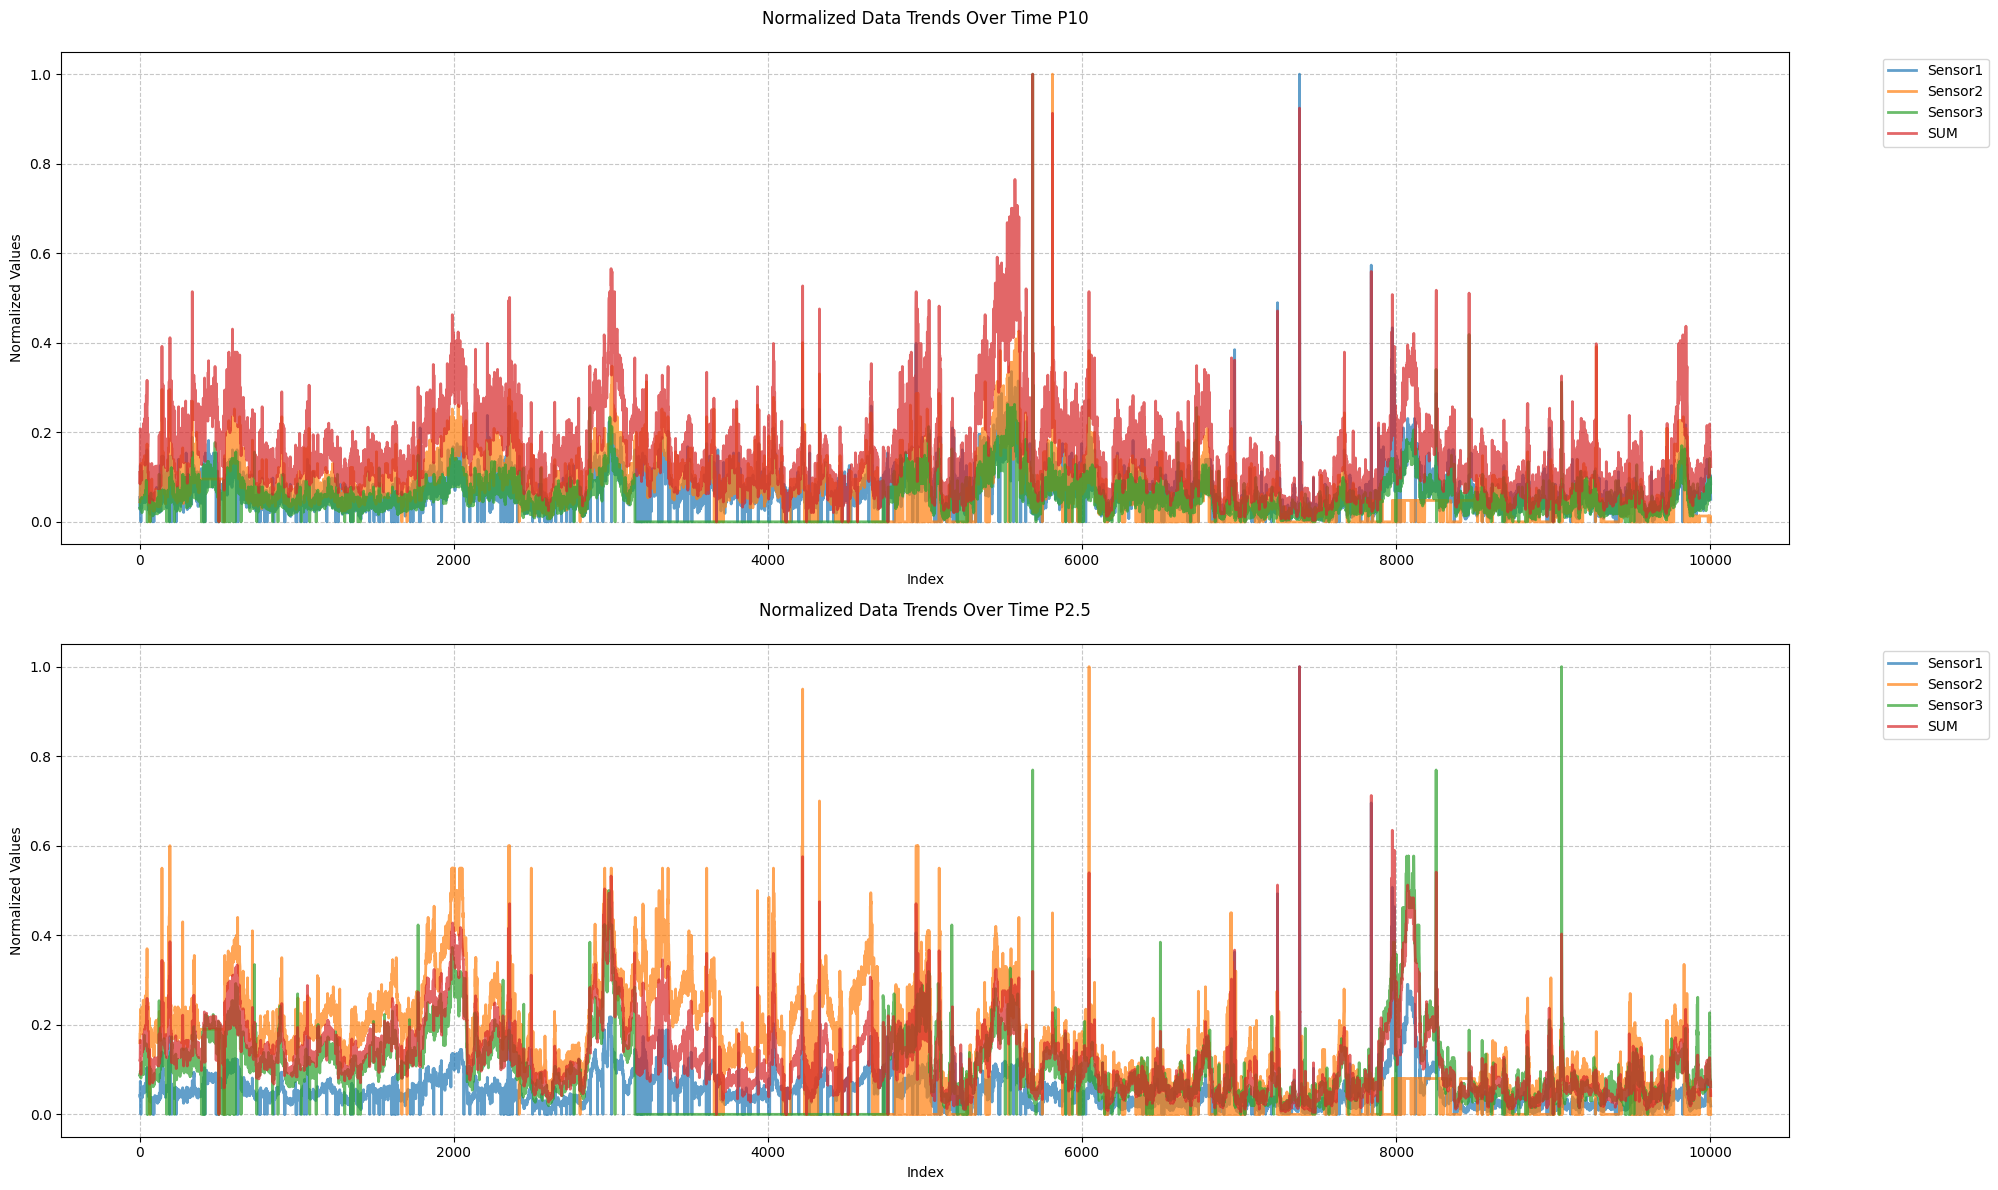

In [ ]:
# Create a figure with subplots: line plots and correlation heatmap
fig = plt.figure(figsize=(20, 12))

# Define grid layout
gs = fig.add_gridspec(2, 2)

# 1. Line plots of all numeric columns
ax1 = fig.add_subplot(gs[0, :])  # Top row, full width

# Get numeric columns
numeric_cols = df10_clean.select_dtypes(include=[np.number]).columns

# Plot each numeric column
for column in numeric_cols:
    # Normalize data to make trends comparable
    normalized_data = (df10_clean[column] - df10_clean[column].min()) / \
                     (df10_clean[column].max() - df10_clean[column].min())
    ax1.plot(normalized_data.index, normalized_data, label=column, linewidth=2, alpha=0.7)

ax1.set_title('Normalized Data Trends Over Time P10', pad=20)
ax1.set_xlabel('Index')
ax1.set_ylabel('Normalized Values')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.7)

# 2. plot 25
ax2 = fig.add_subplot(gs[1, :])  # Bottom row, full width


# Get numeric columns
numeric_cols = df25_clean.select_dtypes(include=[np.number]).columns

# Plot each numeric column
for column in numeric_cols:
    # Normalize data to make trends comparable
    normalized_data = (df25_clean[column] - df25_clean[column].min()) / \
                     (df25_clean[column].max() - df25_clean[column].min())
    ax2.plot(normalized_data.index, normalized_data, label=column, linewidth=2, alpha=0.7)

ax2.set_title('Normalized Data Trends Over Time P2.5', pad=20)
ax2.set_xlabel('Index')
ax2.set_ylabel('Normalized Values')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, linestyle='--', alpha=0.7)

#


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [63]:
# Optional: Save the plot
# plt.savefig('data_visualization.png', dpi=300, bbox_inches='tight')

# Display statistical summary
print("\nStatistical Summary P10:")
print(df10_clean.describe())

print("\nStatistical Summary P2.5:")
print(df25_clean.describe())


Statistical Summary P10:
            Sensor1       Sensor2       Sensor3           SUM
count  10005.000000  10005.000000  10005.000000  10005.000000
mean       9.681299      7.932934      6.833733     24.447966
std        6.428233      7.082428      5.842008     15.331548
min        0.000000      0.000000      0.000000      0.000000
25%        5.500000      1.500000      2.900000     14.000000
50%        8.400000      7.100000      6.000000     21.000000
75%       13.000000     11.000000      9.600000     31.100000
max      143.000000    115.000000    141.000000    155.600000

Statistical Summary P2.5:
            Sensor1       Sensor2       Sensor3           SUM
count  10005.000000  10005.000000  10005.000000  10005.000000
mean       3.519340      2.892674      2.395952      8.807966
std        2.910261      2.407598      2.227771      5.926911
min        0.000000      0.000000      0.000000      0.000000
25%        1.600000      1.000000      0.900000      4.300000
50%        2.9000

In [ ]:
# df10['Time'] = pd.to_datetime(df10['Time'], errors='coerce')
# df10['SUM'] = pd.to_numeric(df10['SUM'], errors='coerce').fillna(0).astype('int')
# print(df10[['Sensor1', 'Sensor2', 'Sensor3','SUM']].describe())

            Sensor1       Sensor2       Sensor3           SUM
count  10005.000000  10005.000000  10005.000000  10005.000000
mean       9.414693      7.730535      6.565317     24.097751
std        6.582941      7.136734      5.905972     15.445589
min        0.000000      0.000000      0.000000      0.000000
25%        5.000000      1.000000      2.000000     14.000000
50%        8.000000      7.000000      6.000000     21.000000
75%       13.000000     11.000000      9.000000     31.000000
max      143.000000    115.000000    141.000000    155.000000


# classifying alerts using RandomForestClassifier

In [ ]:
from scipy.optimize import minimize

# Initial random weights
initial_weights = np.random.rand(3)  # Replace num_weights with the actual number of weights

# Optimization
result = minimize(objective_function, initial_weights, args=(X, y_fire, y_rain))
optimal_weights = result.x

In [ ]:
from sklearn.metrics import accuracy_score

# ... (Your optimization and prediction code) ...

# Assuming you have y_test (true labels) and y_pred (predicted labels)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate error rate
error_rate = 1 - accuracy

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")

# Using Quantum Approach (VQC)

We are calculating the likelihood of fire or rain using objective function and Variational Quantum Classifier

In [ ]:
from qiskit_aer import AerSimulator
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms import VQC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from qiskit_algorithms.optimizers import COBYLA

# Combine datasets (assuming they have columns like 'SENSOR', 'POLLUTANT', 'WEATHER', 'fire_rain_label')
# Add columns from df10, df_pol, and df_w. Adjust column names as per your datasets.



X = combined_df_imputed[:,:]
y = combined_df_imputed['fire_rain_label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define feature map
feature_map = ZZFeatureMap(feature_dimension=2, reps=1)

# Initialize VQC
vqc = VQC(
    feature_map=feature_map,
    ansatz=None,  # You can specify a custom ansatz if needed
    loss='cross_entropy',
    optimizer=COBYLA(),
)

# Convert labels to NumPy arrays for training and testing
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Train the VQC
vqc.fit(X_train, y_train)

# Make predictions
y_pred = vqc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


# How VQC is better than classical approach
1. **Handling High-Dimensional Feature Spaces**
2. **Parallelism and Entanglement**
3. **Efficiency for Specific Quantum-Enhanced Datasets**
4. **Potential for Speedup in Optimization**
5. **Future Quantum Speedup Potential**

**Challenges to Consider:**
- **Scalability and Noise**
- **Model Interpretability**